# Esempio di segmentazione con *FCM* - Notebook 3.2

Import delle librerie necessarie per la simulazione

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Immagine simulata

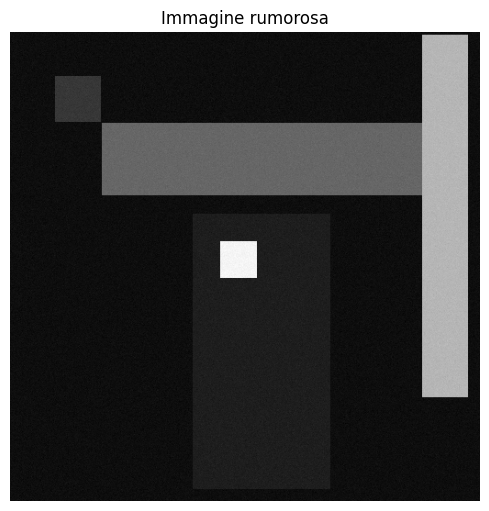

In [7]:
# --- synthetic image ---
image = np.zeros((512, 512), dtype=np.float32)
image[:, :] = 20
image[49:99, 49:99] = 150
image[100:179, 100:449] = 300
image[199:499, 199:349] = 70
image[229:269, 229:269] = 750
image[4:399, 449:499] = 550

sigma = 10
rng = np.random.default_rng(0)  # riproducibilità
imageN = image + sigma * rng.standard_normal(image.shape)

fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
ax.imshow(imageN, cmap="gray")
ax.set_title("Immagine rumorosa")
ax.axis("off")
plt.show()

Segmentazione con *FCM*

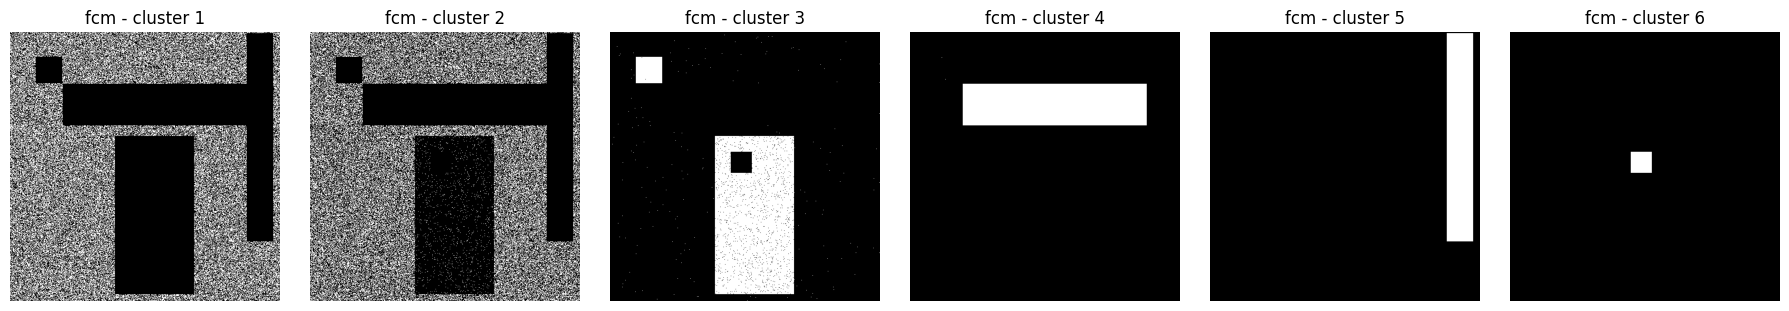

Centroidi (ordinati): [ 12.42321716  28.73445991  72.93222644 299.72096293 549.97746459
 750.14344562]


In [ ]:
# --- fuzzy c-means ---
# cmeans vuole data shape = (features, samples)
x = imageN.astype(np.float64).ravel()
data = x.reshape(1, -1)

cntr, U, _, _, _, _, _ = fuzz.cluster.cmeans(
    data,
    c=6,
    m=2.0,
    error=1e-5,
    maxiter=500,
    init=None
)

# assegno a ogni pixel il cluster con membership massima (hard label)
labels = np.argmax(U, axis=0)  # (N,)

# ordino i cluster per centroide crescente (solo per avere plot ordinati)
order = np.argsort(cntr.ravel())
labels_ord = order[labels]  # rimappa 0..5 secondo l'ordine dei centroidi

# --- masks + plot ---
masks = [(labels_ord == k).reshape(image.shape) for k in range(6)]

fig, ax = plt.subplots(1, 6, figsize=(18, 3), constrained_layout=True)
for k in range(6):
    ax[k].imshow(masks[k], cmap="gray")
    ax[k].set_title(f"fcm - cluster {k+1}")
    ax[k].axis("off")
plt.show()

print("Centroidi (ordinati):", np.sort(cntr.ravel()))